<a href="https://colab.research.google.com/github/geetika18/Tensorflow-Playground/blob/main/02_Neural_Network_Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A classification is where you try to classify something as one thing or another
A few types
* Binary classification 
* Multiclass classification
* Multilabel classification

## Creating data to view and fit


In [2]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
# Check out features
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Visualize data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


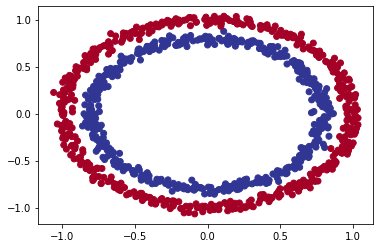

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)



In [7]:
# Input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

1. Create or import a model
2. compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X,y,epochs=100, verbose=0)

In [9]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.693244993686676, 0.5]

Accuracy rate is only 50%. There let's make our model better by adding one more layer.

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(X,y,epochs=100, verbose =0)

model_2.evaluate(X,y)

32/32 [==============================] - 0s 977us/step - loss: 0.6944 - accuracy: 0.5100


[0.6944003105163574, 0.5099999904632568]

## Improving the model

In [11]:
circles["label"].value_counts() 


1    500
0    500
Name: label, dtype: int64

In [12]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y, epochs = 100, verbose=0)

model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

## Plot decision boundary
To visualize our model's predictions
* Take in a trained model, features X and y
* Create a meshgrid of different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class falls)

In [13]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  # Define the axis boundaries of the plot and create a meshgrid

  x_min, x_max = X[:,0].min()- 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  y_pred = model.predict(x_in)

  #check for multiclass

  if len(y_pred[0])> 1:
    print("multi-class prediction")
    y_pred = np.argmax(y-pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #plot the boundary
  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



doing binary classification


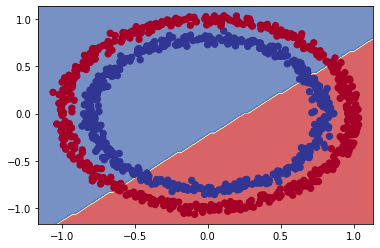

In [14]:
# checkout predictions
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [15]:
# Let's see if our model works for a regression problem
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X+100

# split the data in training and testing 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit the model
#model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs = 100)

we compiled the model for binary classification but we are working on regression so lets change the model to suit our data


In [16]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)
])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

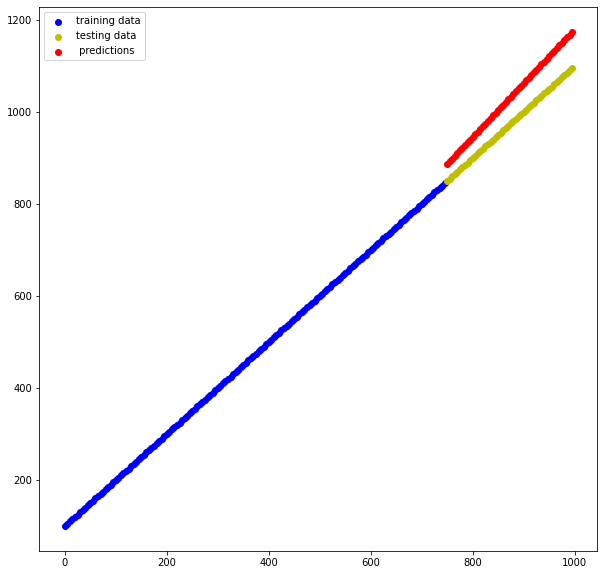

In [17]:
# make predictions
y_reg_preds = model_4.predict(X_reg_test)
plt.figure(figsize=(10,10))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training data")
plt.scatter(X_reg_test, y_reg_test, c="y", label="testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label = " predictions")
plt.legend()

## Non-Linearity


In [18]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])

model_5.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classification


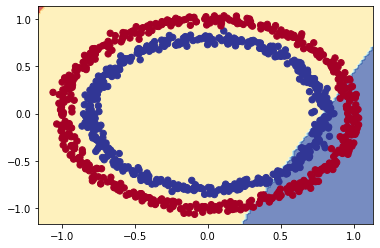

In [19]:
# checkout predictions
plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

### Let's try neural network with non linear activation function


In [20]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    #tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y, epochs=200)


Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.9185 - accuracy: 0.4190
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8502 - accuracy: 0.3710
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8253 - accuracy: 0.3380
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8132 - accuracy: 0.2550
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.8054 - accuracy: 0.2120
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7994 - accuracy: 0.2030
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7946 - accuracy: 0.1640
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7906 - accuracy: 0.1520
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7864 - accuracy: 0.1440
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7829 - accuracy: 0.1680
Epoch 11/

In [21]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 989us/step - loss: 0.0680 - accuracy: 1.0000


[0.06799187511205673, 1.0]

doing binary classification


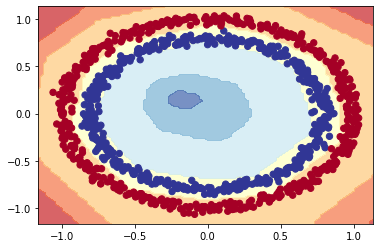

In [22]:
# checkout predictions
plot_decision_boundary(model = model_6,
                       X=X,
                       y=y)

## Final try to make model the best for this data


In [23]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7456 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7320 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7230 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7171 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.4570
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.4660
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7081 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7034 - accuracy: 0.4550
Epoch 11/

In [24]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.9810


[0.5756625533103943, 0.9810000061988831]

doing binary classification


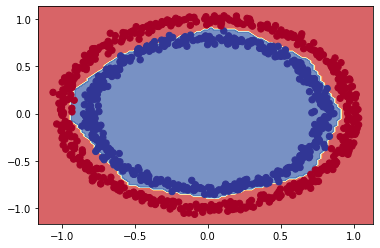

In [25]:
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

## Real Action haha

Now we have have seen the non linear function based neural network so let's so some real action


In [26]:
# Create a tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

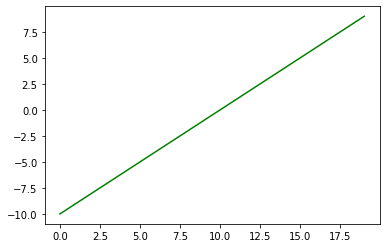

In [27]:
plt.plot(A, c="g")

In [28]:
# replicating the sigmoid function
def sigmoid(x):
  return 1/(1+ tf.exp(-x))

#sigmoid(1.0), tf.math.sigmoid(1.0)

# use this sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

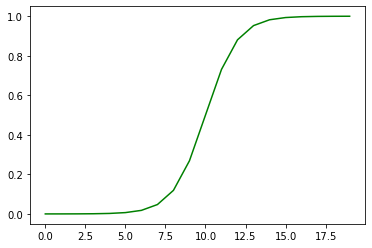

In [29]:
plt.plot(sigmoid(A),c="g")

In [30]:
# replicating relu function
def relu(x):
  return tf.maximum(x,0)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

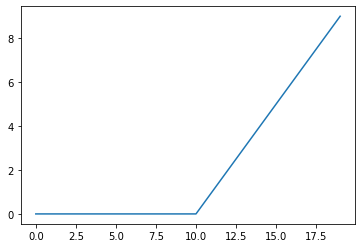

In [31]:
plt.plot(relu(A))

In [32]:
# Replicating linear activation function 
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

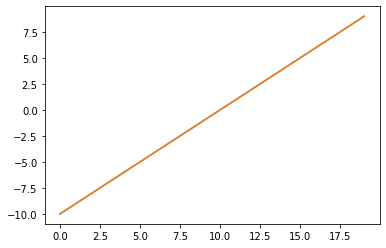

In [35]:
plt.plot(tf.keras.activations.linear(A))
plt.plot(A)

In [36]:
# Does it even change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

In [37]:
len(X)

1000

In [39]:
# Create the training and test dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670,), (330,))

In [51]:
# Create a model 
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
21/21 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5522
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5910
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.5731
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.5731
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6104
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.5866
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6075
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6381 - accuracy: 0.6239
Epoch 9/50
21/21 [==============================] - 0s 1ms/step - loss: 0.6209 - accuracy: 0.6896
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7299
Epoch 11/50
21/21 [

In [52]:
model_8.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9848


[0.0673758015036583, 0.9848484992980957]

In [53]:
model_8.predict(X_test), y_test 

(array([[9.97292340e-01],
        [7.40002692e-02],
        [9.91737187e-01],
        [4.38598394e-01],
        [6.75530195e-01],
        [9.47960675e-01],
        [6.76988784e-05],
        [4.57435846e-04],
        [9.48816657e-01],
        [3.24266255e-02],
        [3.06841165e-01],
        [9.99773264e-01],
        [7.02053308e-04],
        [9.24800456e-01],
        [2.20462084e-02],
        [9.99948502e-01],
        [9.94323134e-01],
        [2.94920802e-03],
        [9.74878550e-01],
        [5.26468158e-02],
        [2.76494622e-02],
        [1.37507915e-04],
        [9.83022213e-01],
        [2.74419785e-04],
        [8.58217478e-04],
        [4.04247046e-02],
        [2.79524922e-03],
        [1.22322439e-04],
        [7.12066889e-04],
        [9.86138940e-01],
        [9.97386575e-01],
        [7.79271126e-04],
        [3.29131961e-01],
        [9.87552881e-01],
        [1.87288523e-02],
        [9.69035506e-01],
        [9.93428946e-01],
        [9.85315323e-01],
        [9.8

doing binary classification
doing binary classification


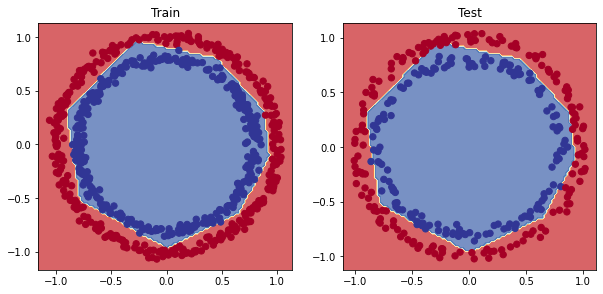

In [60]:
plt.figure(figsize= (10,10))
plt.subplot(2,2,1)
plt.title("Train")
plot_decision_boundary(model = model_8, X = X_train, y=y_train)
plt.subplot(2,2,2)
plt.title("Test")
plot_decision_boundary(model = model_8, X= X_test, y= y_test)
plt.show();

## Visualizing training history

In [62]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)


,loss,accuracy
0,0.683741,0.552239
1,0.675780,0.591045
2,0.670552,0.573134
3,0.666356,0.573134
4,0.662963,0.610448
5,0.655366,0.586567
6,0.647659,0.607463
7,0.638088,0.623881
8,0.620945,0.689552
9,0.599483,0.729851


Text(0.5, 1.0, 'Model_8 loss curves')

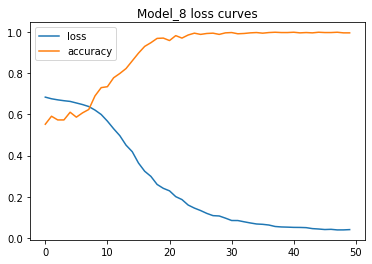

In [63]:
# plt the loss courves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

For many functions loss functions going down - model improving


## Finding the best learning rate
To find the ideal learning rate - 
* Learning rate **callback** - a functionality that can be added to model while training
* Another model
* A modified loss curve


In [64]:
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_9.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))


history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4881 - lr: 1.0000e-04
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4866 - lr: 1.1220e-04
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.4851 - lr: 1.2589e-04
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4896 - lr: 1.4125e-04
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4970 - lr: 1.5849e-04
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5015 - lr: 1.7783e-04
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.4955 - lr: 1.9953e-04
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5030 - lr: 2.2387e-04
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss:

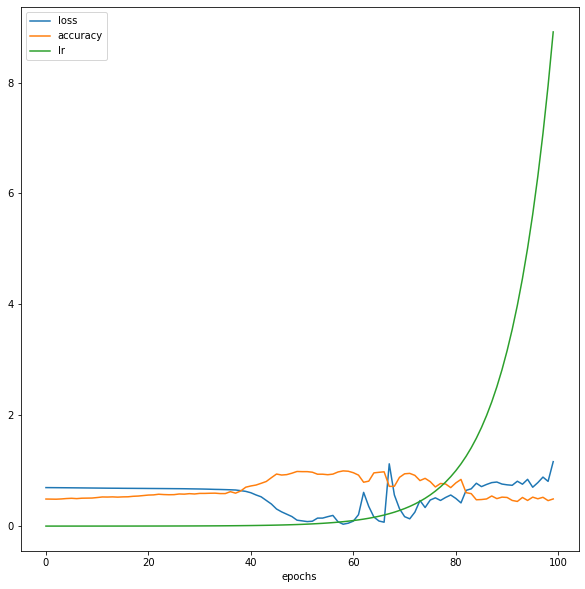

In [65]:
pd.DataFrame(history_9.history).plot(figsize=(10,10), xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

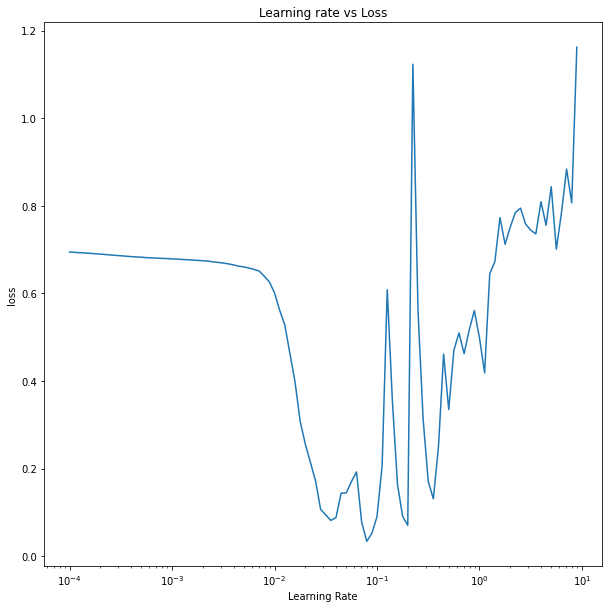

In [68]:
# plot the lr vs loss

lrs = 1e-4*(10**(tf.range(100)/20))

plt.figure(figsize=(10,10))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning rate vs Loss")


In [71]:
# Let's try a higher lr
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_10.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ["accuracy"])

# Create a learning rate callback 
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))


history_10 = model_10.fit(X_train, y_train, epochs = 20)

Epoch 1/20
21/21 [==============================] - 1s 4ms/step - loss: 0.6815 - accuracy: 0.5537
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.6045
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6209
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.6985
Epoch 5/20
21/21 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7627
Epoch 6/20
21/21 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.8612
Epoch 7/20
21/21 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.9373
Epoch 8/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.9716
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 0.1967 - accuracy: 0.9851
Epoch 10/20
21/21 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9925
Epoch 11/20
21/21 [

In [72]:
model_10.evaluate(X_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0679 - accuracy: 0.9818


[0.06794561445713043, 0.9818181991577148]

In [73]:
model_8.evaluate(X_test, y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0674 - accuracy: 0.9848


[0.0673758015036583, 0.9848484992980957]

doing binary classification
doing binary classification


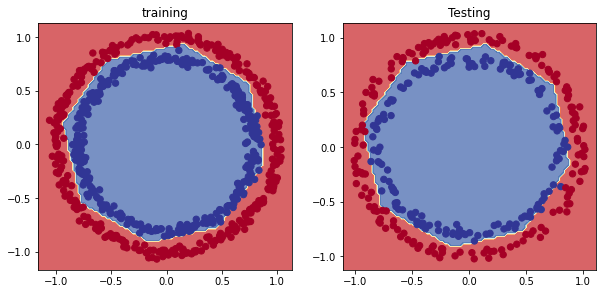

In [74]:
# Plot the decision boundary 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("training")
plot_decision_boundary(model_10, X = X_train, y = y_train)

plt.subplot(2,2,2)
plt.title("Testing")
plot_decision_boundary(model_10, X = X_test, y = y_test)
plt.show();

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-Score(Sklearn)
* Confusion Matrix(sklearn)
* Classification report(Sklearn)


In [75]:
#Check the accuracy 
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"loss:{loss}")
print(f"accuracy:{accuracy}")

11/11 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9818
loss:0.06794561445713043
accuracy:0.9818181991577148


In [86]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)
y_preds = tf.squeeze(tf.math.round(y_pred))
confusion_matrix(y_test, y_preds)
#y_preds.shape, y_test.shape
#y_preds[:10],y_test[:10]

array([[172,   2],
       [  4, 152]])

### How about making it prettier - the confusion matrix


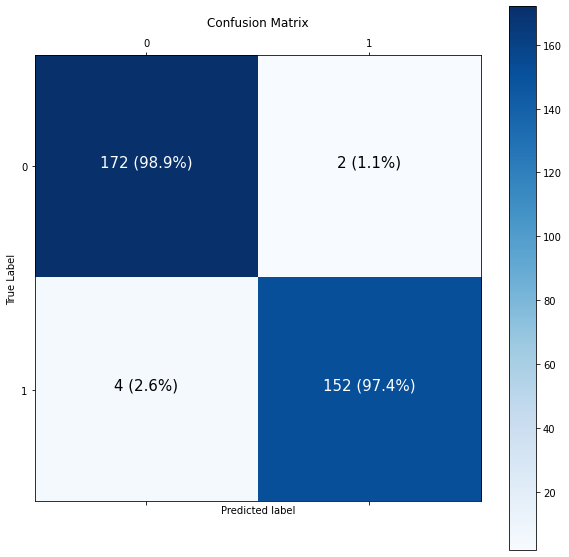

In [94]:
import itertools

figsize = (10,10)
# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_pred))
cm_norm = cm.astype("float")/ cm.sum(axis=1)[:, np.newaxis] # normalise
n_classes = cm.shape[0]

# Make prettier
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
   labels = classes
else:
   labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
       ylabel = "True Label",
       xlabel = "Predicted label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

threshold = (cm.max() + cm.min())/2.

#Plot
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j]>threshold else "black",
           size = 15)


# Working with a larger example ( Multiclass Classification)